In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_ajuste as sa

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [4]:
df = pd.read_csv("datos/autorenew_knn_outliers_encoded.csv", index_col = 0)

### 

In [ ]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='price')

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='regresion')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.head()

,Real,Predicho,Conjunto,Modelo,Residuos
135269,5500.0,2435.823604,Train,regresion,3064.176396
115896,2890.0,8509.639340,Train,regresion,-5619.639340
284424,1000.0,51.453771,Train,regresion,948.546229
155731,2650.0,3544.914342,Train,regresion,-894.914342
253484,900.0,-692.773890,Train,regresion,1592.773890


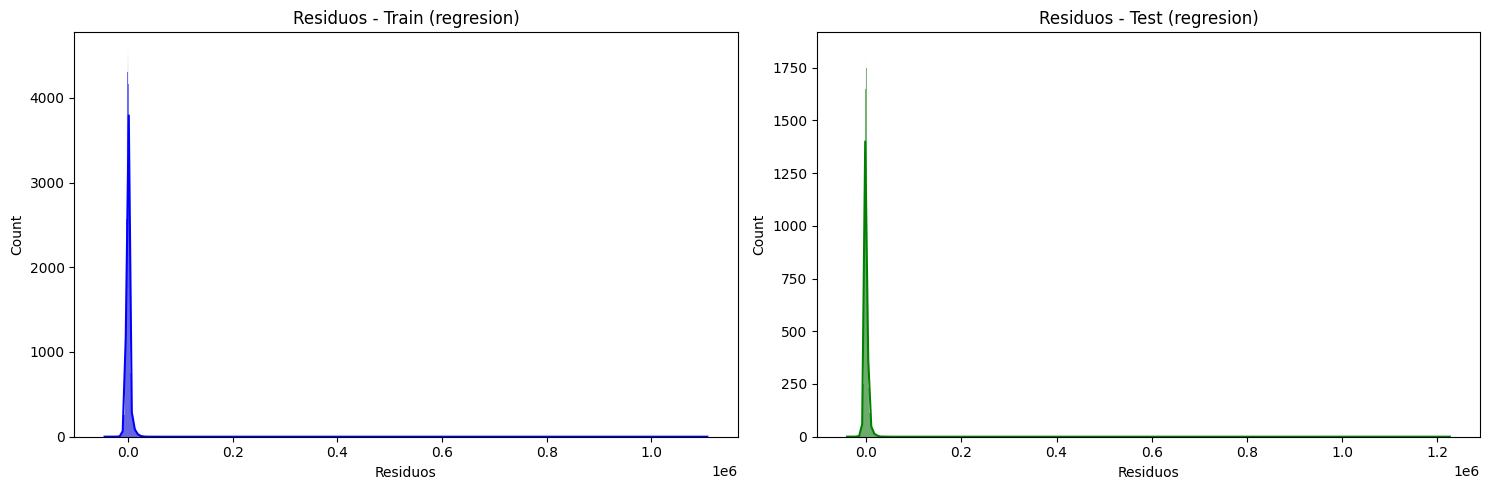

In [6]:
# llamamos a la función para ver los residuos
analisis.plot_residuos("regresion")

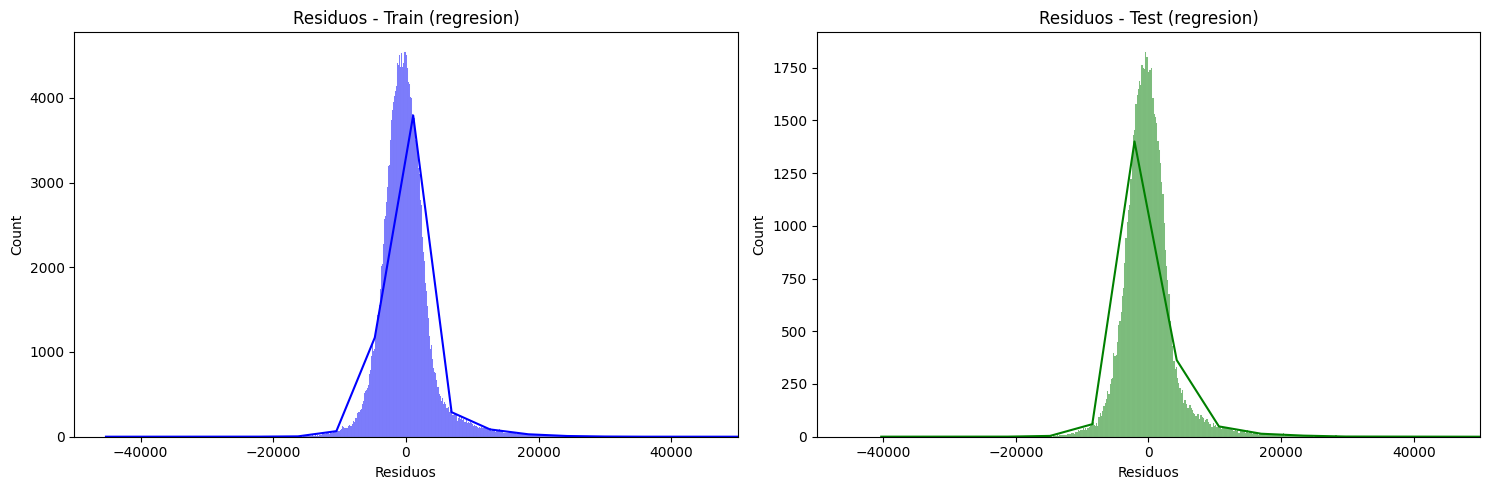

In [17]:
modelo = "regresion"
lim = 50000

data = analisis.resultados[analisis.resultados["Modelo"] == modelo]
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data[data["Conjunto"] == "Train"], x="Residuos", kde=True, ax=ax[0], color="blue")
sns.histplot(data[data["Conjunto"] == "Test"], x="Residuos", kde=True, ax=ax[1], color="green")

# Agregar límites al eje x
ax[0].set_xlim(-lim, lim)
ax[1].set_xlim(-lim, lim)

ax[0].set_title(f"Residuos - Train ({modelo})")
ax[1].set_title(f"Residuos - Test ({modelo})")
plt.tight_layout()
plt.show()

In [18]:
data

,Real,Predicho,Conjunto,Modelo,Residuos
135269,5500.0,2435.823604,Train,regresion,3064.176396
115896,2890.0,8509.639340,Train,regresion,-5619.639340
284424,1000.0,51.453771,Train,regresion,948.546229
155731,2650.0,3544.914342,Train,regresion,-894.914342
253484,900.0,-692.773890,Train,regresion,1592.773890
...,...,...,...,...,...
78693,1500.0,3739.151006,Test,regresion,-2239.151006
135820,12399.0,9531.214095,Test,regresion,2867.785905
277104,4800.0,8926.695473,Test,regresion,-4126.695473
67436,850.0,2965.230935,Test,regresion,-2115.230935


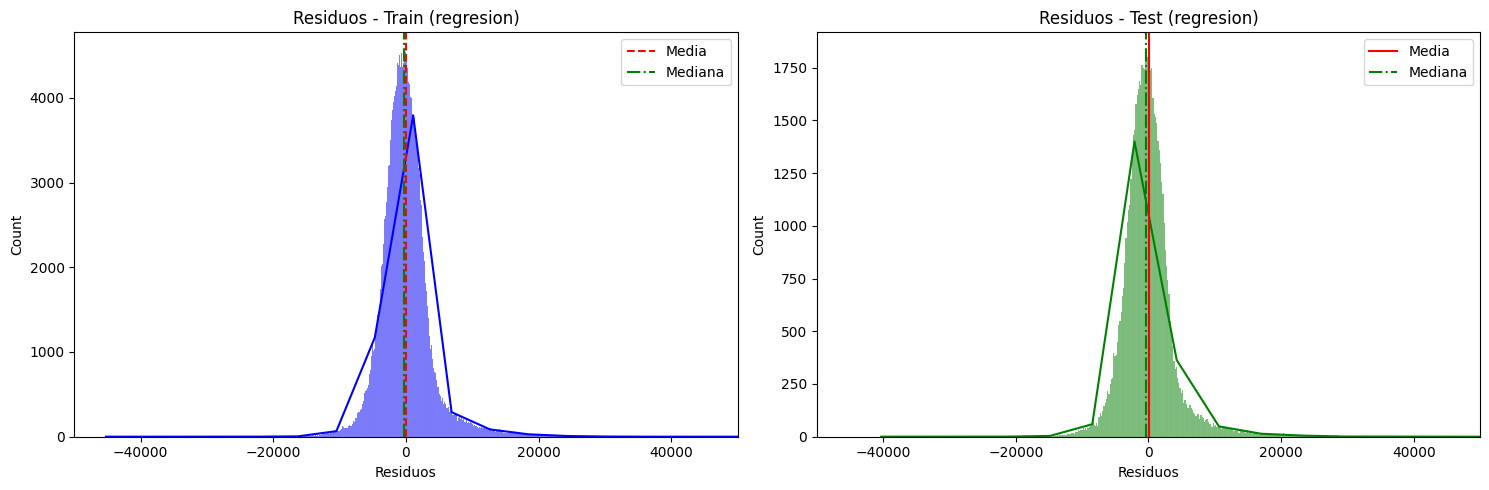

In [20]:
modelo = "regresion"

# Filtrar los datos
data = analisis.resultados[analisis.resultados["Modelo"] == modelo]

# Crear la figura
_, ax = plt.subplots(1, 2, figsize=(15, 5))

# Train data
train_data = data[data["Conjunto"] == "Train"]["Residuos"]
sns.histplot(train_data, kde=True, ax=ax[0], color="blue")

# Calcular métricas para Train
media_train = train_data.mean()
mediana_train = train_data.median()

# Agregar líneas verticales en la media, mediana y moda para Train
ax[0].axvline(media_train, color="red", linestyle="--", label="Media")
ax[0].axvline(mediana_train, color="green", linestyle="-.", label="Mediana")

# Títulos y leyendas para Train
ax[0].set_title(f"Residuos - Train ({modelo})")
ax[0].legend()

# Test data
test_data = data[data["Conjunto"] == "Test"]["Residuos"]
sns.histplot(test_data, kde=True, ax=ax[1], color="green")

# Calcular métricas para Test
media_test = test_data.mean()
mediana_test = test_data.median()
moda_test = test_data.mode().iloc[0]  # Primer valor de la moda

# Agregar líneas verticales en la media, mediana y moda para Test
ax[1].axvline(media_test, color="red", linestyle="-", label="Media")
ax[1].axvline(mediana_test, color="green", linestyle="-.", label="Mediana")

# Títulos y leyendas para Test
ax[1].set_title(f"Residuos - Test ({modelo})")
ax[1].legend()

# Agregar límites al eje x
ax[0].set_xlim(-lim, lim)
ax[1].set_xlim(-lim, lim)

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [22]:
media_train

-2.5205324925383836e-12

In [8]:
# llamamos al método para calcular las métricas del modelo
analisis.calcular_metricas("regresion")

,train,test
R2,3.913909e-01,2.632634e-01
MAE,2.707320e+03,2.740056e+03
MSE,3.898220e+07,6.994346e+07
RMSE,6.243573e+03,8.363221e+03


---

Para hacer la segunda parte no podemos usar la clase porque no es suficientemente flexible, así que vamos a programarlo aquí. Next steps es ponerlo todo junto y más organizado

In [31]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):

    metricas = {
        'train': {
            'r2_score': r2_score(y_train, y_train_pred),
            'MAE': mean_absolute_error(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'test': {
            'r2_score': r2_score(y_test, y_test_pred),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }
    }

    return pd.DataFrame(metricas).T

In [25]:
df = pd.read_csv("datos/autorenew_knn_outliers_encoded.csv", index_col = 0)

In [26]:
# Variables predictoras. Todas menos la VR
X = df.drop("price", axis=1)
# Variable respuesta
y = df[["price"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [29]:
modelo_lineal = LinearRegression()

# Entrenamiento
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predicciones para el test
y_test_pred = modelo_lineal.predict(X_test)

# Predecimos el entrenamiento
y_train_pred = modelo_lineal.predict(X_train)

### K fold

In [48]:
# n_splits es la K
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# le pasamos el modelo, los datos originales, el método de cross validation y el método de scoring
score_r2 = cross_val_score(modelo_lineal, X, y, cv = kf, scoring="r2")
score_rmse = cross_val_score(modelo_lineal, X, y, cv = kf, scoring="neg_root_mean_squared_error")

In [49]:
np.mean(score_r2)

0.4812893192249407

In [50]:
abs(np.mean(score_rmse))

5946.486318213351

El valor de r2 es sorprendentemente bueno, es decir que las variables predictoras están seleccionadas más o menos bien. El rmse está regular, a ver si de otra forma lo podemos reducir

---

### Leave one out

Por el momento no lo hago porque va a tardar la vida

In [52]:
df_coef = pd.DataFrame(modelo_lineal.coef_, columns=X.columns).T

In [53]:
df_coef.round(2).sort_values(by = 0, key = abs, ascending=False)

,0
powerCV,2201.84
yearOfRegistration,1744.69
kilometer,-1561.01
abtest_control,-7.97
abtest_test,7.97
fuelType,0.51
brand,0.44
notRepairedDamage,0.41
vehicleType,0.35
gearbox,0.21


Podríamos probar a eliminar alguna de las variables con menor coeficiente para la predicción. Si acaso next steps.

En general vemos que las variables numéricas son las que tienen unos coeficientes mayores. Quizás sea por el encoding? Ni idea

---

### Árbol de decisión

In [115]:
# Diccionario de hiper parámetros
params_arbol = {
    'max_depth': [i for i in range(6, 10)],
    'min_samples_split': [i for i in range(1, 5)],
    'min_samples_leaf': [i for i in range(5, 30, 5)],
    'max_leaf_nodes': [i for i in range(40, 200, 20)]
}

In [116]:
# Vamos a hacer un árbol de decisión con los hiperparámetros que le hemos dado y con un cross validation de 5
grid_search_Arbol = GridSearchCV(DecisionTreeRegressor(random_state=42),
                                 param_grid = params_arbol,
                                 cv = 5,
                                 scoring = "neg_mean_squared_error",
                                 n_jobs = -1)

grid_search_Arbol.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_leaf_nodes': [40, 60, 80, 100, 120, 140, 160,
                                            180],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [117]:
modelo_final_arbol = grid_search_Arbol.best_estimator_

In [118]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=9, max_leaf_nodes=180, min_samples_leaf=25,
                      random_state=42)

In [123]:
y_pred_test = modelo_final_arbol.predict(X_test)
y_pred_train = modelo_final_arbol.predict(X_train)
df_metricas_arbol = metricas(y_train, y_pred_train, y_test, y_pred_test )
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.517913,1692.188742,3.087827e+07,5556.821912
test,0.345774,1730.674691,6.211017e+07,7881.000787


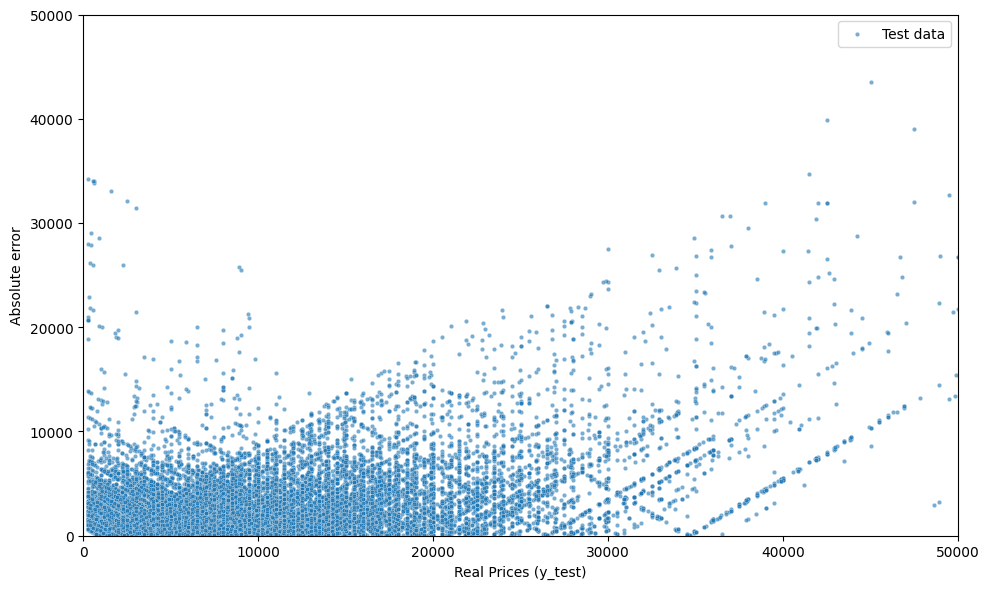

In [122]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=abs(y_test-y_pred_test), alpha=0.6, s=10, label="Test data")
plt.xlabel("Real Prices (y_test)")
plt.ylabel("Absolute error")
plt.legend()

plt.xlim(0, 5e4)
plt.ylim(0, 5e4)
plt.tight_layout()
plt.show()


In [111]:
# Obtenemos un dataframe donde cada fila es un árbol con sus características y métricas
df_resultados_arbol = pd.DataFrame(grid_search_Arbol.cv_results_).sort_values(by = 'rank_test_score')

# Nos quedamos con las columnas que nos interesan
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']

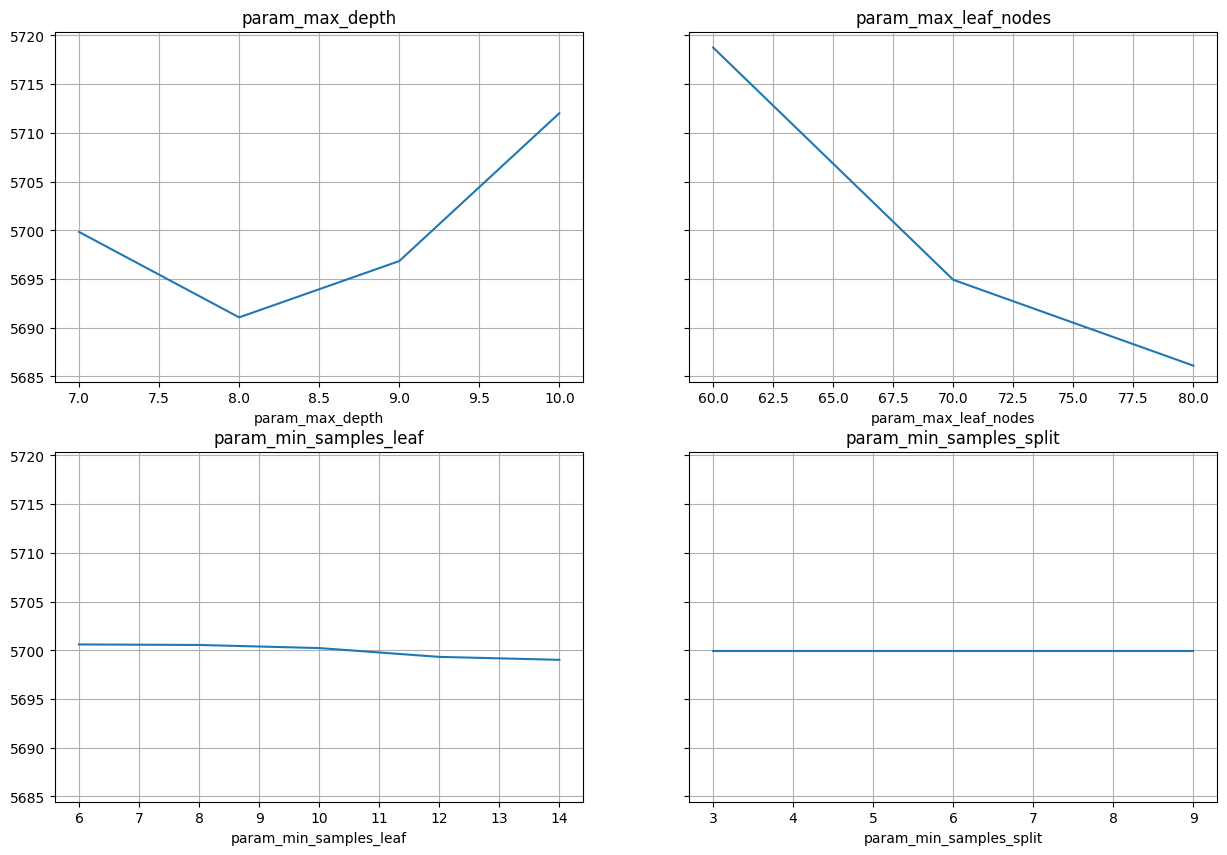

In [112]:
# Vemos cómo cambia el RMSE con las combinaciones de hiperparámetros
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15, 10), sharey=True)
axes = axes.flat

# Todas menos el MSE
for i, col in enumerate(df_resultados_arbol_filtrado.columns[:-1]):

    df_rmse = np.sqrt(df_resultados_arbol_filtrado.groupby(col)['MSE'].mean().abs())

    sns.lineplot(x = df_rmse.index, y = df_rmse.values, ax = axes[i])
    axes[i].grid()
    axes[i].set_title(col)

In [113]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ['Importancia'], index=X.columns).sort_values(by = 'Importancia', ascending=False).round(2)

,Importancia
yearOfRegistration,0.57
powerCV,0.31
kilometer,0.06
brand,0.04
vehicleType,0.02
gearbox,0.00
fuelType,0.00
notRepairedDamage,0.00
monthOfRegistration,0.00
abtest_control,0.00
